FANOVA PLOTS

In [18]:
import sys
import os
import pandas as pd
from os.path import abspath, join as path_join
import numpy as np

import json
import seaborn as sns
PARENT_DIR =  path_join(os.getcwd(), "..", "..")
print(PARENT_DIR)
sys.path.insert(0, PARENT_DIR)

from itertools import product
from glob import glob
from collections import OrderedDict
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.transforms import Bbox
from matplotlib.ticker import FormatStrFormatter
import ConfigSpace as CS
#from autoda.data_augmentation import ImageAugmentation
from fanova import fANOVA
from fanova import visualizer


sns.set_style(style='whitegrid')


plt.rcParams['figure.figsize'] = (8.0, 6.0)
plt.rcParams['xtick.labelsize'] = 15
plt.rcParams['ytick.labelsize'] = 15
plt.rc('font', size=15.0, family='serif')
plt.rcParams['text.latex.preamble']=[r"\usepackage{amsmath}"]


sns.set_style(style='whitegrid')


plt.rcParams['figure.figsize'] = (8.0, 6.0)
plt.rcParams['xtick.labelsize'] = 15
plt.rcParams['ytick.labelsize'] = 15
plt.rc('font', size=15.0, family='serif')
plt.rcParams['text.latex.preamble']=[r"\usepackage{amsmath}"]

# READ DATA
path = path_join(abspath("."), "..", "..", "AutoData")
print("path", path)
msg = "Results to plot do not exist. Check path. {}".format(path)
assert os.path.exists(path), msg


"""
order = ["coarse_dropout_size_percent_lower" , "scale_lower" , "coarse_dropout_upper",
         "coarse_dropout_size_percent_upper", "scale_upper", "coarse_dropout_lower",
         "rotation_upper", "coarse_dropout_probability", "pad_crop_upper", "vertical_flip",
         "pad_crop_lower", "rotation_probability", "horizontal_flip", "augment_probability", 
         "rotation_lower", "pad_crop_probability", "scale_probability"
]

order = [ "scale_lower" , "scale_upper", 
         "rotation_upper",  "pad_upper", "crop_upper", "vertical_flip",
         "pad_lower", "crop_lower", "rotation_probability", "horizontal_flip", "augment_probability", 
         "rotation_lower", "pad_probability", "crop_probability", "scale_probability"
]

benchmarks = ["LeNet", "AlexNet"]
optimizers = ("BOHB",)
datasets = ("mnist", "cifar10", "cifar100",)
"""
marker="random"

def read_data(dataset, benchmark="AlexNet", marker="random"):
    base_path = path_join(path, dataset, "random", benchmark)#
    #base_path = path_join(path, "random_search", dataset)
    filenames = glob("{base_path}/{marker}*{dataset}*.json".format(base_path=base_path, marker=marker, dataset=dataset))
    #print(filenames)
    
    def read_files(filenames):
        data = {}
        test_error = []
        configs=[]
        for filename in filenames:
            with open(filename, "r") as f:
                json_content = json.load(f)
                test_error.append(json_content["test_error"])
                # test_error.append(json_content["validation_error"])
                configs.append(json_content["configs"])
                data["configs"] = configs
                data["test_error"] = test_error
                #print(json_content)
            #print(data)
        return data
    data= read_files(filenames=filenames)
    return data

benchmark = "LeNet"
dataset = "mnist"
results = read_data(dataset=dataset, benchmark=benchmark)




/home/misgana/Workspace/AutoDA/notebooks/../..
path /home/misgana/Workspace/AutoDA/notebooks/../../AutoData


In [19]:
AUTODA_DIR =  path_join(os.getcwd(), "..", "..","AutoDA")
sys.path.insert(0, AUTODA_DIR)
# READ DATA
path = path_join(abspath("."), "..", "..", "AutoData")
print("path", path)
msg = "Results to plot do not exist. Check path. {}".format(path)
assert os.path.exists(path), msg

from autoda.data_augmentation import ImageAugmentation
cs = ImageAugmentation.get_config_space()

order = []
for h in cs.get_hyperparameters():
    order.append(h.name)
X = []
for c in results["configs"]:
    vec = []
    for j, k in enumerate(order):
        if c[k] is not None: 
            vec.append(c[k])    
        else:
            vec.append(0)
    X.append(vec)
X = np.array(X)
y = results["test_error"]

output_directory = path_join(path, "plots/fanova/{}".format(dataset))
f = fANOVA(X, y, config_space=cs)
vis = visualizer.Visualizer(f, cs, directory=output_directory )


path /home/misgana/Workspace/AutoDA/notebooks/../../AutoData


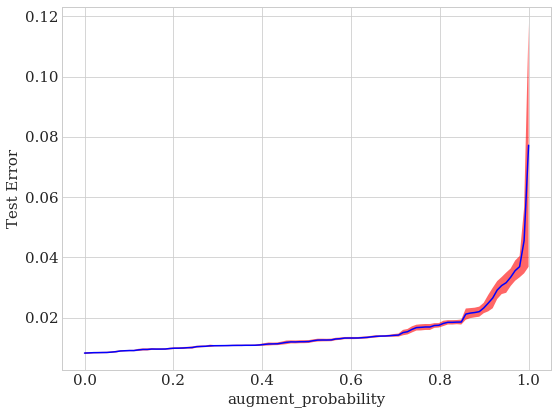

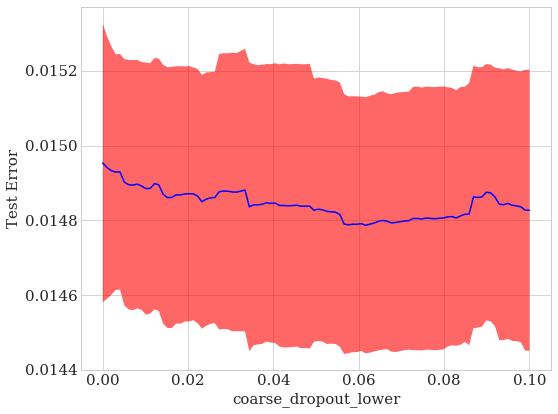

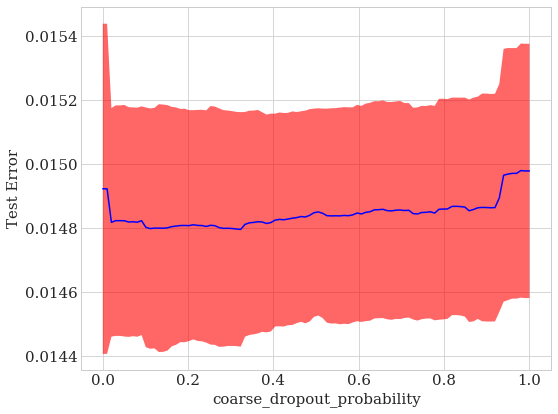

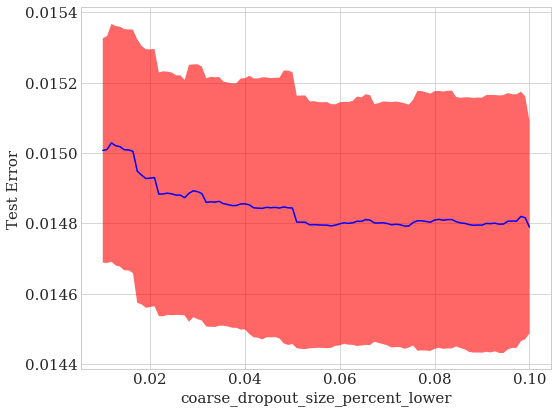

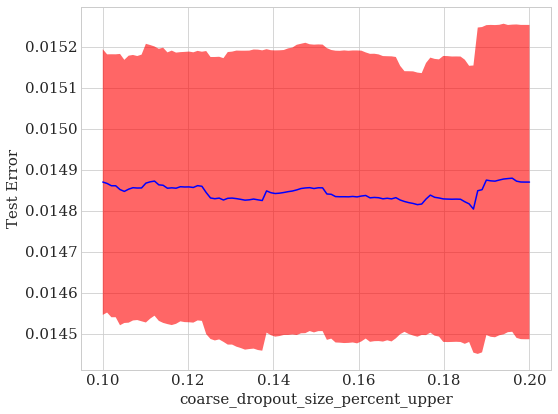

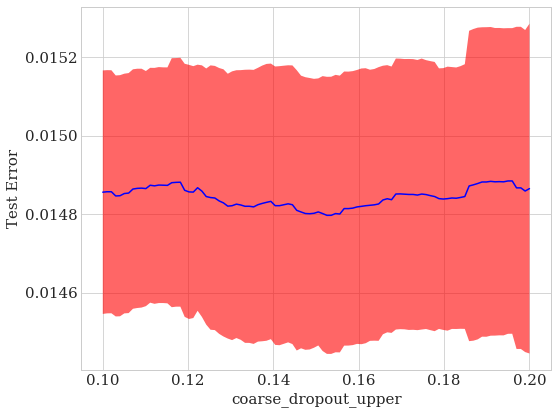

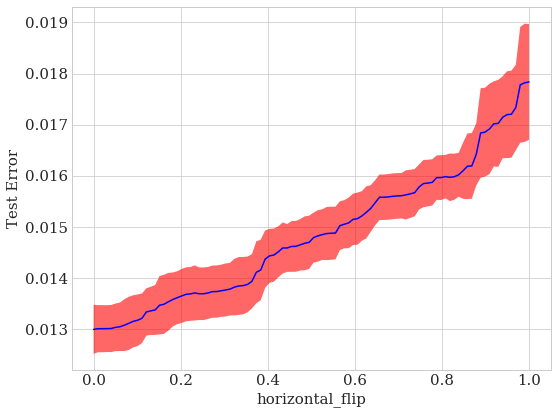

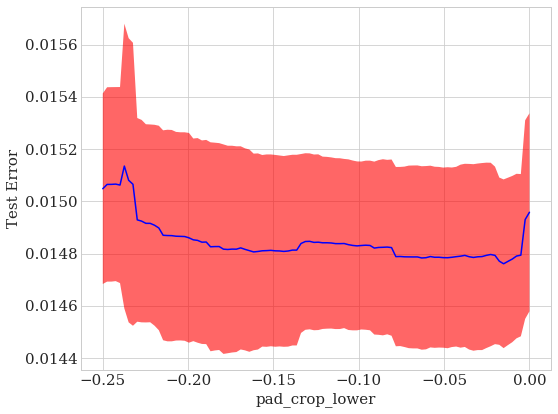

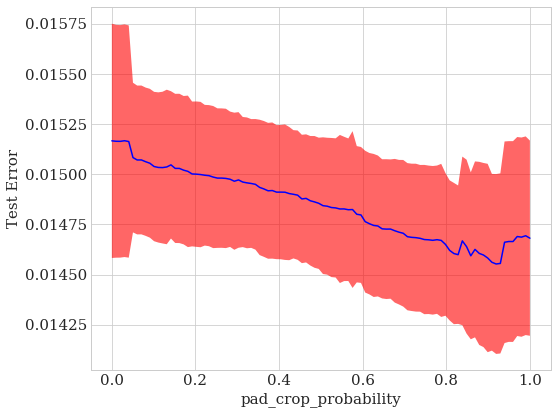

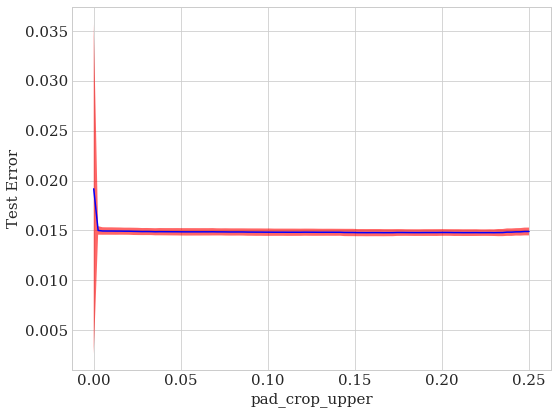

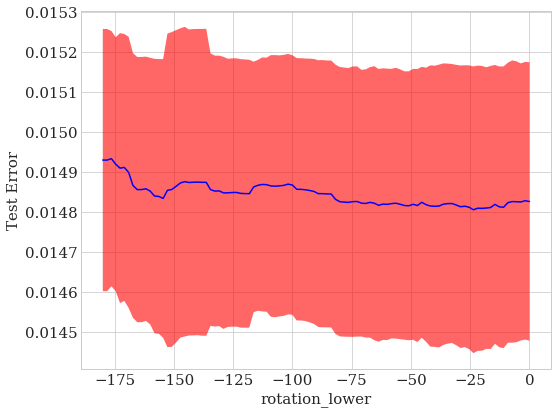

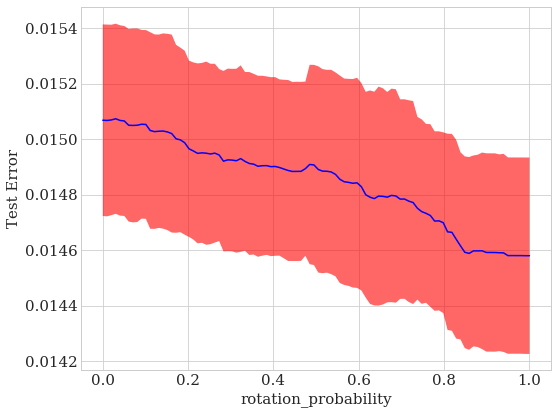

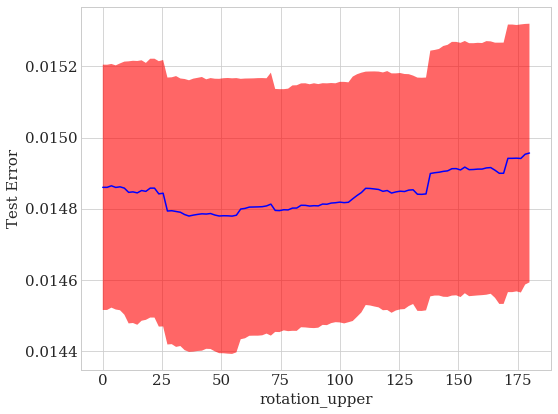

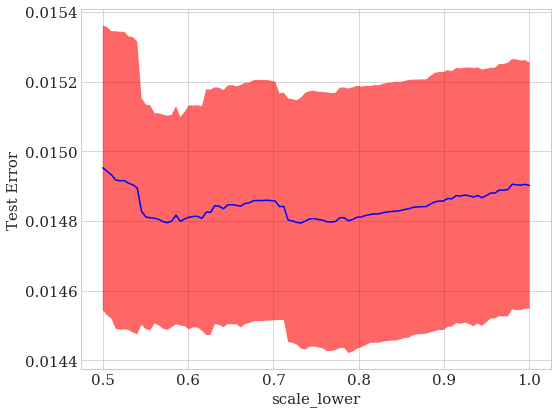

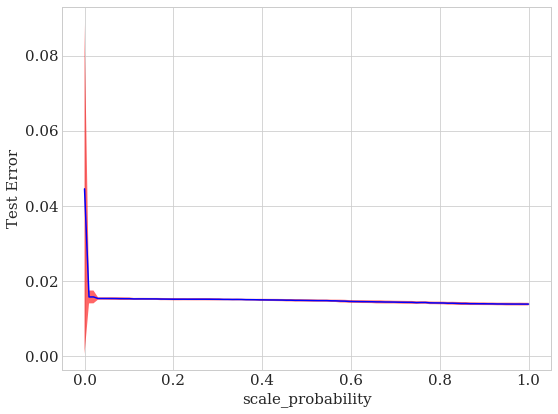

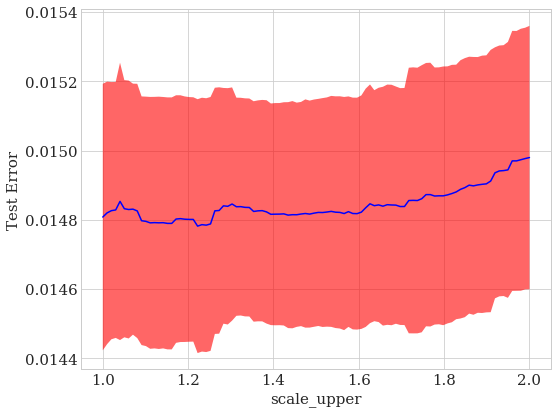

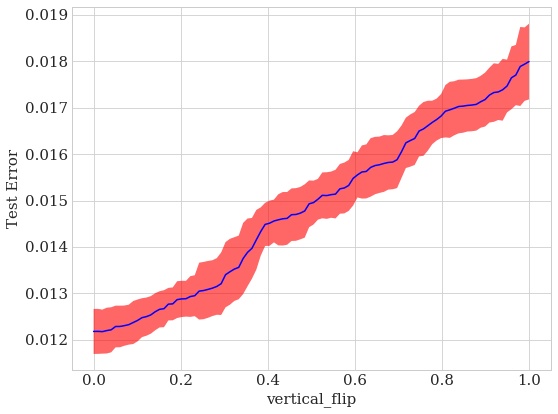

In [20]:

# FANOVA PLOTS
for i in range(len(order)):
    plt = vis.plot_marginal(i, show=False)
    plt.xlabel(order[i])
    plt.ylabel("Test Error")
    plt.show()

creating /home/misgana/Workspace/AutoDA/notebooks/../../AutoData/plots/fanova/mnist/augment_probability.png
creating /home/misgana/Workspace/AutoDA/notebooks/../../AutoData/plots/fanova/mnist/coarse_dropout_lower.png
creating /home/misgana/Workspace/AutoDA/notebooks/../../AutoData/plots/fanova/mnist/coarse_dropout_probability.png
creating /home/misgana/Workspace/AutoDA/notebooks/../../AutoData/plots/fanova/mnist/coarse_dropout_size_percent_lower.png
creating /home/misgana/Workspace/AutoDA/notebooks/../../AutoData/plots/fanova/mnist/coarse_dropout_size_percent_upper.png
creating /home/misgana/Workspace/AutoDA/notebooks/../../AutoData/plots/fanova/mnist/coarse_dropout_upper.png
creating /home/misgana/Workspace/AutoDA/notebooks/../../AutoData/plots/fanova/mnist/horizontal_flip.png
creating /home/misgana/Workspace/AutoDA/notebooks/../../AutoData/plots/fanova/mnist/pad_crop_lower.png
creating /home/misgana/Workspace/AutoDA/notebooks/../../AutoData/plots/fanova/mnist/pad_crop_probability.png

creating /home/misgana/Workspace/AutoDA/notebooks/../../AutoData/plots/fanova/mnist/coarse_dropout_lower_scale_probability.png
creating /home/misgana/Workspace/AutoDA/notebooks/../../AutoData/plots/fanova/mnist/interactive_plots
creating /home/misgana/Workspace/AutoDA/notebooks/../../AutoData/plots/fanova/mnist/coarse_dropout_lower_scale_upper.png
creating /home/misgana/Workspace/AutoDA/notebooks/../../AutoData/plots/fanova/mnist/interactive_plots
creating /home/misgana/Workspace/AutoDA/notebooks/../../AutoData/plots/fanova/mnist/coarse_dropout_lower_vertical_flip.png
creating /home/misgana/Workspace/AutoDA/notebooks/../../AutoData/plots/fanova/mnist/interactive_plots
creating /home/misgana/Workspace/AutoDA/notebooks/../../AutoData/plots/fanova/mnist/coarse_dropout_probability_coarse_dropout_size_percent_lower.png
creating /home/misgana/Workspace/AutoDA/notebooks/../../AutoData/plots/fanova/mnist/interactive_plots
creating /home/misgana/Workspace/AutoDA/notebooks/../../AutoData/plots/f

creating /home/misgana/Workspace/AutoDA/notebooks/../../AutoData/plots/fanova/mnist/interactive_plots
creating /home/misgana/Workspace/AutoDA/notebooks/../../AutoData/plots/fanova/mnist/coarse_dropout_size_percent_upper_rotation_lower.png
creating /home/misgana/Workspace/AutoDA/notebooks/../../AutoData/plots/fanova/mnist/interactive_plots
creating /home/misgana/Workspace/AutoDA/notebooks/../../AutoData/plots/fanova/mnist/coarse_dropout_size_percent_upper_rotation_probability.png
creating /home/misgana/Workspace/AutoDA/notebooks/../../AutoData/plots/fanova/mnist/interactive_plots
creating /home/misgana/Workspace/AutoDA/notebooks/../../AutoData/plots/fanova/mnist/coarse_dropout_size_percent_upper_rotation_upper.png
creating /home/misgana/Workspace/AutoDA/notebooks/../../AutoData/plots/fanova/mnist/interactive_plots
creating /home/misgana/Workspace/AutoDA/notebooks/../../AutoData/plots/fanova/mnist/coarse_dropout_size_percent_upper_scale_lower.png
creating /home/misgana/Workspace/AutoDA/n

creating /home/misgana/Workspace/AutoDA/notebooks/../../AutoData/plots/fanova/mnist/pad_crop_lower_vertical_flip.png
creating /home/misgana/Workspace/AutoDA/notebooks/../../AutoData/plots/fanova/mnist/interactive_plots
creating /home/misgana/Workspace/AutoDA/notebooks/../../AutoData/plots/fanova/mnist/pad_crop_probability_pad_crop_upper.png
creating /home/misgana/Workspace/AutoDA/notebooks/../../AutoData/plots/fanova/mnist/interactive_plots
creating /home/misgana/Workspace/AutoDA/notebooks/../../AutoData/plots/fanova/mnist/pad_crop_probability_rotation_lower.png
creating /home/misgana/Workspace/AutoDA/notebooks/../../AutoData/plots/fanova/mnist/interactive_plots
creating /home/misgana/Workspace/AutoDA/notebooks/../../AutoData/plots/fanova/mnist/pad_crop_probability_rotation_probability.png
creating /home/misgana/Workspace/AutoDA/notebooks/../../AutoData/plots/fanova/mnist/interactive_plots
creating /home/misgana/Workspace/AutoDA/notebooks/../../AutoData/plots/fanova/mnist/pad_crop_prob

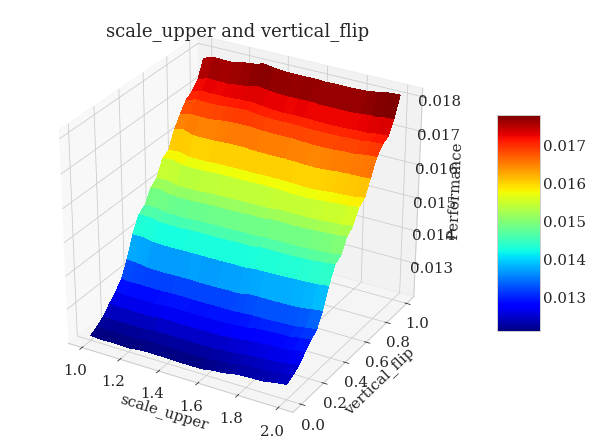

In [21]:
vis.create_all_plots()

In [6]:
# PIMP PLOTS
names = []
importances = []

for h in cs.get_hyperparameters():
    imp = f.quantify_importance((h.name,))[(h.name,)]['individual importance']

    names.append(h.name)
    importances.append(imp)


idx = np.argsort(importances)[::-1]
for i in idx:
    print(names[i], importances[i])

vertical_flip 0.34421190851636085
augment_probability 0.2799882504697937
rotation_probability 0.018348686309655533
horizontal_flip 0.006874540102675196
scale_probability 0.001961488009254329
pad_crop_upper 0.0008799325868454652
scale_lower 0.0005793232834074162
scale_upper 0.0005207727281802012
coarse_dropout_size_percent_upper 0.0005023391355978952
coarse_dropout_lower 0.0004627454782013949
pad_crop_probability 0.00035534708530698717
rotation_upper 0.0003494446751808343
rotation_lower 0.00025191658305653863
coarse_dropout_upper 0.0002442378379591838
pad_crop_lower 0.00024004999558052882
coarse_dropout_size_percent_lower 0.00014498034157456153
coarse_dropout_probability 0.00013071660893868657


In [ ]:
f.get_most_important_pairwise_marginals(n=5)

In [29]:
# PIMP PLOTS

AUTODA_DIR =  path_join(os.getcwd(), "..", "..","AutoDA")
print(AUTODA_DIR)
sys.path.insert(0, AUTODA_DIR)
# READ DATA
path = path_join(abspath("."), "..", "..", "AutoData")
print("path", path)
msg = "Results to plot do not exist. Check path. {}".format(path)
assert os.path.exists(path), msg

from autoda.data_augmentation import ImageAugmentation

b = results["configs"][0]
cs = ImageAugmentation.get_config_space()
incumbent = CS.Configuration(cs, values=b)
from smac.scenario.scenario import Scenario



scenario = Scenario({"run_obj": "quality",
                     "runcount-limit": 10000,
                     "cs": cs,
                     "deterministic": "true",
                     "initial_incumbent": "RANDOM",
                     "output_dir": ""})

print(scenario)

from pimp.pimp import PIMP
plt.rcParams['text.usetex'] =False

pimp = PIMP(scenario, X=X, y=y, mode=['lpi'], save_folder=output_directory)
pimp.imp.incumbent = incumbent
print(pimp.X.shape)
print(pimp.y.shape)

result = pimp.compute_importances()
print(result)

/home/misgana/Workspace/AutoDA/notebooks/../../AutoDA
path /home/misgana/Workspace/AutoDA/notebooks/../../AutoData


  0%|          | 0/8517 [00:00<?, ?it/s]

(285, 17)
(285,)


Predicting performances for neighbors of vertical_flip: 100%|##########| 8517/8517 [00:06<00:00, 1355.04it/s]                 
Plotting results for vertical_flip: 100%|##########| 17/17 [00:06<00:00,  2.67it/s]                   

({'lpi': {'order': ['pad_crop_upper', 'scale_lower', 'rotation_probability', 'rotation_upper', 'vertical_flip', 'coarse_dropout_size_percent_upper', 'coarse_dropout_size_percent_lower', 'rotation_lower', 'horizontal_flip', 'pad_crop_probability', 'augment_probability', 'pad_crop_lower', 'coarse_dropout_lower', 'coarse_dropout_probability', 'coarse_dropout_upper', 'scale_probability', 'scale_upper'], 'imp': OrderedDict([('pad_crop_upper', 0.7973565781271834), ('scale_lower', 0.15059911492260744), ('rotation_probability', 0.03529344331963123), ('rotation_upper', 0.006700040517878477), ('vertical_flip', 0.005940314648809129), ('coarse_dropout_size_percent_upper', 0.002046810394144356), ('coarse_dropout_size_percent_lower', 0.001095024140977541), ('rotation_lower', 0.0005625480402086698), ('horizontal_flip', 0.00022093181568543253), ('pad_crop_probability', 8.34087999066219e-05), ('augment_probability', 3.930387422319742e-05), ('pad_crop_lower', 3.187376583189158e-05), ('coarse_dropout_low